In [41]:
from os import listdir
from numpy import asarray
from numpy import vstack
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from numpy import savez_compressed


In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
import tensorflow

In [44]:
target_shape=(256,256)

In [45]:
def load_images(path, size=(256,256)):
    data_list = list()
    filenames = list()
    # enumerate filenames in directory, assume all are images
    for filename in listdir(path):
        # load and resize the image
        pixels = load_img(path +"\\"+ filename, target_size=size)
        # convert to numpy array
        pixels = img_to_array(pixels)
        # store
        data_list.append(pixels)
        filenames.append(filename)
    return asarray(data_list),filenames

In [46]:
from tensorflow import keras

In [47]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to c:\users\abhijeet\appdata\local\temp\pip-req-build-juyjyj2s


  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git 'C:\Users\Abhijeet\AppData\Local\Temp\pip-req-build-juyjyj2s'
  fatal: unable to access 'https://www.github.com/keras-team/keras-contrib.git/': Failed to connect to www.github.com port 443 after 21262 ms: Timed out
  error: subprocess-exited-with-error
  
  git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git 'C:\Users\Abhijeet\AppData\Local\Temp\pip-req-build-juyjyj2s' did not run successfully.
  exit code: 128
  
  See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git 'C:\Users\Abhijeet\AppData\Local\Temp\pip-req-build-juyjyj2s' did not run successfully.
exit code: 128

See above for output.

note: This error originates from a subprocess, and is likely not a prob

In [48]:
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
cust = {'InstanceNormalization': InstanceNormalization}

In [49]:
model = keras.models.load_model(r"C:\Users\Abhijeet\Desktop\g_model_AtoB_002940.h5",cust)

In [50]:
import matplotlib.pyplot as plt

In [51]:
keras.__version__

'2.12.0'

In [52]:
!pip install keras==2.7.0

In [53]:
import keras as kr

In [54]:
tensorflow.__version__

'2.12.0'

In [55]:
def select_sample(dataset,filenames):
    # choose random instances
    ix = np.random.randint(0, dataset.shape[0], 1)
    # retrieve selected images
    print(ix)
    op = filenames[ix[0]]
    X = dataset[ix]
    return X,op

In [56]:
root = r"C:\Users\Abhijeet\Downloads\images"

In [57]:
imgs,filenames=load_images(root+'//input',target_shape)

In [58]:
print(filenames)

['1.jpg', '2.jpg', '4.jpg']


In [59]:
A_real,name = select_sample(imgs,filenames)
#plt.imshow(A_real[0].astype(np.uint8))
predicted=model.predict(A_real)[0]

[2]
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 4s 4s/step


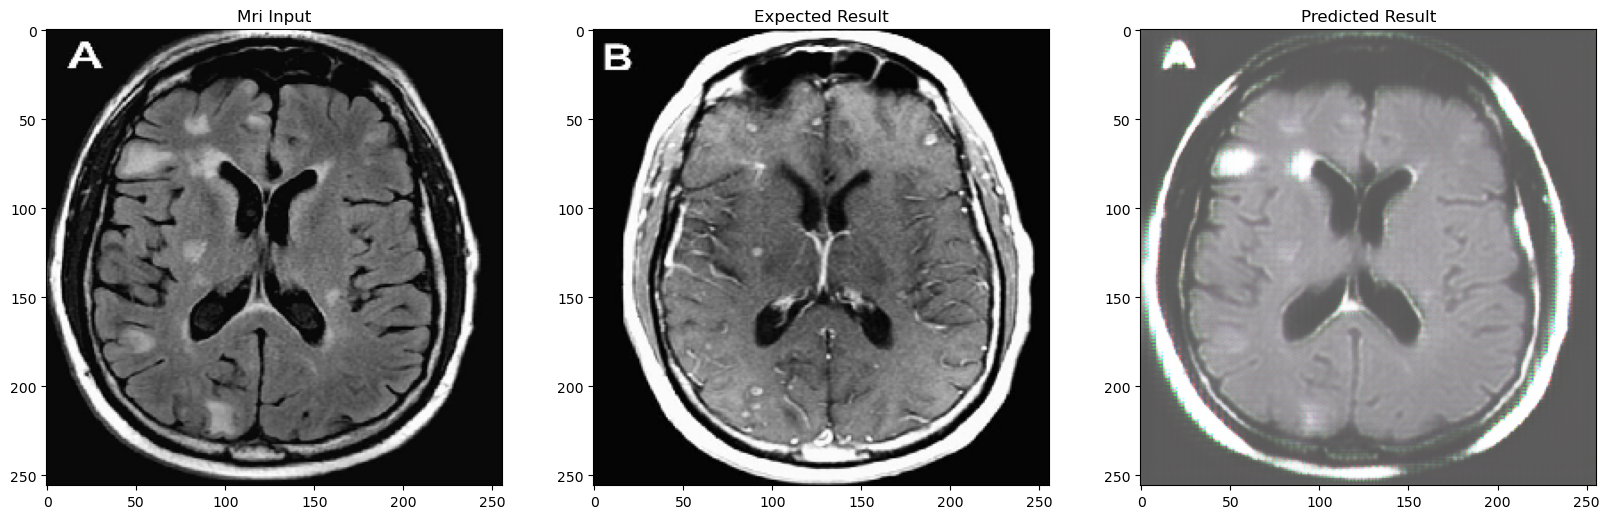

In [60]:
fig, axes = plt.subplots(1,3,figsize=(20,20))
axes[0].set_title("Mri Input")
axes[0].imshow(load_img(root+"//input//"+name,target_size=target_shape))
axes[1].set_title("Expected Result")
axes[1].imshow(load_img(root+"//output//"+name,target_size=target_shape))
axes[2].set_title("Predicted Result")
axes[2].imshow((predicted+2)/3.0,cmap='binary')